In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

pd.reset_option('display.float_format')





In [3]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\datasets\\Melbourne_housing.csv")

In [4]:
df["Type"] = df["Type"].replace({"h":"House", "u":"Unit", "t":"Townhouse"})


In [5]:
df["Date"].describe()

count          34857
unique            78
top       28/10/2017
freq            1119
Name: Date, dtype: object

In [6]:
df1 = df.drop(["Address","Method","SellerG","Date","Distance","Postcode","CouncilArea","Lattitude","Longtitude","Regionname","Propertycount"], axis="columns")

In [7]:
df1 = df1.rename(columns={"Bedroom2":"Bedroom","Landsize":"Landsize(sqm)","BuildingArea":"BuildingArea(sqm)","Car":"Carpark"})

In [8]:
df1["Suburb"] = df1["Suburb"].apply(lambda x: x.strip())
location_stats = df1["Suburb"].value_counts(ascending=False)
location_stats

Suburb
Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
Belgrave             1
Cranbourne East      1
Yarra Glen           1
Olinda               1
Menzies Creek        1
Name: count, Length: 351, dtype: int64

In [9]:
location_stats.values.sum()

np.int64(34857)

In [10]:
len(location_stats[location_stats>10])

281

In [11]:
len(location_stats)

351

In [12]:
len(location_stats[location_stats<=10])

70

In [13]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Suburb
Diggers Rest       10
Hallam             10
Mickleham          10
Coolaroo           10
Notting Hill       10
                   ..
Belgrave            1
Cranbourne East     1
Yarra Glen          1
Olinda              1
Menzies Creek       1
Name: count, Length: 70, dtype: int64

In [14]:
len(df1["Suburb"].unique())

351

In [15]:
df1["Suburb"] = df1["Suburb"].apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df1["Suburb"].unique())

282

In [16]:
location_dummies = (pd.get_dummies(df1["Suburb"])).astype(int)
location_dummies.head()

,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,Braybrook,Briar Hill,Brighton,Brighton East,Broadmeadows,Brooklyn,Brunswick,Brunswick East,Brunswick West,Bulleen,Bundoora,Burnley,Burnside,Burnside Heights,Burwood,Burwood East,Cairnlea,Camberwell,Campbellfield,Canterbury,Carlton,Carlton North,Carnegie,Caroline Springs,Carrum,Carrum Downs,Caulfield,Caulfield East,Caulfield North,Caulfield South,Chadstone,Chelsea,Chelsea Heights,Cheltenham,Chirnside Park,Clarinda,Clayton,Clayton South,Clifton Hill,Coburg,Coburg North,Collingwood,Craigieburn,Cranbourne,Cremorne,Croydon,Croydon Hills,Croydon North,Croydon South,Dallas,Dandenong,Dandenong North,Deepdene,Deer Park,Delahey,Derrimut,Diamond Creek,Dingley Village,Docklands,Doncaster,Doncaster East,Donvale,Doreen,Doveton,Eaglemont,East Melbourne,Edithvale,Elsternwick,Eltham,Eltham North,Elwood,Endeavour Hills,Epping,Essendon,Essendon North,Essendon West,Fairfield,Fawkner,Ferntree Gully,Fitzroy,Fitzroy North,Flemington,Footscray,Forest Hill,Frankston,Frankston North,Frankston South,Gardenvale,Gisborne,Gladstone Park,Glen Huntly,Glen Iris,Glen Waverley,Glenroy,Gowanbrae,Greensborough,Greenvale,Hadfield,Hampton,Hampton East,Hawthorn,Hawthorn East,Heathmont,Heidelberg,Heidelberg Heights,Heidelberg West,Highett,Hillside,Hoppers Crossing,Hughesdale,Huntingdale,Ivanhoe,Ivanhoe East,Jacana,Kealba,Keilor,Keilor Downs,Keilor East,Keilor Park,Kensington,Kew,Kew East,Keysborough,Kilsyth,Kings Park,Kingsbury,Kingsville,Knoxfield,Kooyong,Kurunjang,Lalor,Langwarrin,Lower Plenty,MacLeod,Maidstone,Malvern,Malvern East,Maribyrnong,McKinnon,Meadow Heights,Melbourne,Melton,Melton South,Melton West,Mentone,Mernda,Middle Park,Mill Park,Mitcham,Mont Albert,Montmorency,Moonee Ponds,Moorabbin,Mooroolbark,Mordialloc,Mount Waverley,Mulgrave,Murrumbeena,Narre Warren,Newport,Niddrie,Noble Park,North Melbourne,Northcote,Nunawading,Oak Park,Oakleigh,Oakleigh East,Oakleigh South,Ormond,Pakenham,Parkdale,Parkville,Pascoe Vale,Plumpton,Point Cook,Port Melbourne,Prahran,Preston,Princes Hill,Reservoir,Richmond,Ringwood,Ringwood East,Ringwood North,Ripponlea,Rosanna,Rowville,Roxburgh Park,Sandringham,Scoresby,Seaford,Seaholme,Seddon,South Kingsville,South Melbourne,South Morang,South Yarra,Southbank,Spotswood,Springvale,Springvale South,St Albans,St Helena,St Kilda,Strathmore,Strathmore Heights,Sunbury,Sunshine,Sunshine North,Sunshine West,Surrey Hills,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
type_dummies = (pd.get_dummies(df1["Type"])).astype("int")
type_dummies.head()

,House,Townhouse,Unit
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [18]:
df2 = pd.concat([df1, location_dummies.drop("other", axis="columns"), type_dummies.drop("Unit", axis="columns")], axis="columns")

In [19]:
df3 = df2.drop(["Suburb","Type"], axis="columns")

In [20]:
df3["Age"] = 2024 - df3["YearBuilt"]

In [21]:
df4 = df3.drop(["YearBuilt"], axis="columns")


In [22]:
col = df4.pop("Age")
df4.insert(7,"Age",col)

In [23]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform", metric="nan_euclidean")
df5 = imputer.fit_transform(df4)


In [24]:
df6 = pd.DataFrame(df5, columns=df4.columns)
df6.head()

,Rooms,Price,Bedroom,Bathroom,Carpark,Landsize(sqm),BuildingArea(sqm),Age,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,Braybrook,Briar Hill,Brighton,Brighton East,Broadmeadows,Brooklyn,Brunswick,Brunswick East,Brunswick West,Bulleen,Bundoora,Burnley,Burnside,Burnside Heights,Burwood,Burwood East,Cairnlea,Camberwell,Campbellfield,Canterbury,Carlton,Carlton North,Carnegie,Caroline Springs,Carrum,Carrum Downs,Caulfield,Caulfield East,Caulfield North,Caulfield South,Chadstone,Chelsea,Chelsea Heights,Cheltenham,Chirnside Park,Clarinda,Clayton,Clayton South,Clifton Hill,Coburg,Coburg North,Collingwood,Craigieburn,Cranbourne,Cremorne,Croydon,Croydon Hills,Croydon North,Croydon South,Dallas,Dandenong,Dandenong North,Deepdene,Deer Park,Delahey,Derrimut,Diamond Creek,Dingley Village,Docklands,Doncaster,Doncaster East,Donvale,Doreen,Doveton,Eaglemont,East Melbourne,Edithvale,Elsternwick,Eltham,Eltham North,Elwood,Endeavour Hills,Epping,Essendon,Essendon North,Essendon West,Fairfield,Fawkner,Ferntree Gully,Fitzroy,Fitzroy North,Flemington,Footscray,Forest Hill,Frankston,Frankston North,Frankston South,Gardenvale,Gisborne,Gladstone Park,Glen Huntly,Glen Iris,Glen Waverley,Glenroy,Gowanbrae,Greensborough,Greenvale,Hadfield,Hampton,Hampton East,Hawthorn,Hawthorn East,Heathmont,Heidelberg,Heidelberg Heights,Heidelberg West,Highett,Hillside,Hoppers Crossing,Hughesdale,Huntingdale,Ivanhoe,Ivanhoe East,Jacana,Kealba,Keilor,Keilor Downs,Keilor East,Keilor Park,Kensington,Kew,Kew East,Keysborough,Kilsyth,Kings Park,Kingsbury,Kingsville,Knoxfield,Kooyong,Kurunjang,Lalor,Langwarrin,Lower Plenty,MacLeod,Maidstone,Malvern,Malvern East,Maribyrnong,McKinnon,Meadow Heights,Melbourne,Melton,Melton South,Melton West,Mentone,Mernda,Middle Park,Mill Park,Mitcham,Mont Albert,Montmorency,Moonee Ponds,Moorabbin,Mooroolbark,Mordialloc,Mount Waverley,Mulgrave,Murrumbeena,Narre Warren,Newport,Niddrie,Noble Park,North Melbourne,Northcote,Nunawading,Oak Park,Oakleigh,Oakleigh East,Oakleigh South,Ormond,Pakenham,Parkdale,Parkville,Pascoe Vale,Plumpton,Point Cook,Port Melbourne,Prahran,Preston,Princes Hill,Reservoir,Richmond,Ringwood,Ringwood East,Ringwood North,Ripponlea,Rosanna,Rowville,Roxburgh Park,Sandringham,Scoresby,Seaford,Seaholme,Seddon,South Kingsville,South Melbourne,South Morang,South Yarra,Southbank,Spotswood,Springvale,Springvale South,St Albans,St Helena,St Kilda,Strathmore,Strathmore Heights,Sunbury,Sunshine,Sunshine North,Sunshine West,Surrey Hills,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,House,Townhouse
0,2.0,942200.0,2.0,1.0,1.0,126.0,84.09,104.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [25]:

df6["Room_area_ratio"] = df6["BuildingArea(sqm)"] / df6["Rooms"]

df7 = df6[
    ((df6["House"] == 1) & (df6["Room_area_ratio"] >= 12) & (df6["Room_area_ratio"] <= 80)) |
    ((df6["Townhouse"] == 1) & (df6["Room_area_ratio"] >= 10) & (df6["Room_area_ratio"] <= 70)) 
]


In [26]:
df7 = df7.drop(["Room_area_ratio"], axis = "columns")

In [27]:
df7

,Rooms,Price,Bedroom,Bathroom,Carpark,Landsize(sqm),BuildingArea(sqm),Age,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,Braybrook,Briar Hill,Brighton,Brighton East,Broadmeadows,Brooklyn,Brunswick,Brunswick East,Brunswick West,Bulleen,Bundoora,Burnley,Burnside,Burnside Heights,Burwood,Burwood East,Cairnlea,Camberwell,Campbellfield,Canterbury,Carlton,Carlton North,Carnegie,Caroline Springs,Carrum,Carrum Downs,Caulfield,Caulfield East,Caulfield North,Caulfield South,Chadstone,Chelsea,Chelsea Heights,Cheltenham,Chirnside Park,Clarinda,Clayton,Clayton South,Clifton Hill,Coburg,Coburg North,Collingwood,Craigieburn,Cranbourne,Cremorne,Croydon,Croydon Hills,Croydon North,Croydon South,Dallas,Dandenong,Dandenong North,Deepdene,Deer Park,Delahey,Derrimut,Diamond Creek,Dingley Village,Docklands,Doncaster,Doncaster East,Donvale,Doreen,Doveton,Eaglemont,East Melbourne,Edithvale,Elsternwick,Eltham,Eltham North,Elwood,Endeavour Hills,Epping,Essendon,Essendon North,Essendon West,Fairfield,Fawkner,Ferntree Gully,Fitzroy,Fitzroy North,Flemington,Footscray,Forest Hill,Frankston,Frankston North,Frankston South,Gardenvale,Gisborne,Gladstone Park,Glen Huntly,Glen Iris,Glen Waverley,Glenroy,Gowanbrae,Greensborough,Greenvale,Hadfield,Hampton,Hampton East,Hawthorn,Hawthorn East,Heathmont,Heidelberg,Heidelberg Heights,Heidelberg West,Highett,Hillside,Hoppers Crossing,Hughesdale,Huntingdale,Ivanhoe,Ivanhoe East,Jacana,Kealba,Keilor,Keilor Downs,Keilor East,Keilor Park,Kensington,Kew,Kew East,Keysborough,Kilsyth,Kings Park,Kingsbury,Kingsville,Knoxfield,Kooyong,Kurunjang,Lalor,Langwarrin,Lower Plenty,MacLeod,Maidstone,Malvern,Malvern East,Maribyrnong,McKinnon,Meadow Heights,Melbourne,Melton,Melton South,Melton West,Mentone,Mernda,Middle Park,Mill Park,Mitcham,Mont Albert,Montmorency,Moonee Ponds,Moorabbin,Mooroolbark,Mordialloc,Mount Waverley,Mulgrave,Murrumbeena,Narre Warren,Newport,Niddrie,Noble Park,North Melbourne,Northcote,Nunawading,Oak Park,Oakleigh,Oakleigh East,Oakleigh South,Ormond,Pakenham,Parkdale,Parkville,Pascoe Vale,Plumpton,Point Cook,Port Melbourne,Prahran,Preston,Princes Hill,Reservoir,Richmond,Ringwood,Ringwood East,Ringwood North,Ripponlea,Rosanna,Rowville,Roxburgh Park,Sandringham,Scoresby,Seaford,Seaholme,Seddon,South Kingsville,South Melbourne,South Morang,South Yarra,Southbank,Spotswood,Springvale,Springvale South,St Albans,St Helena,St Kilda,Strathmore,Strathmore Heights,Sunbury,Sunshine,Sunshine North,Sunshine West,Surrey Hills,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,House,Townhouse
0,2.0,942200.0,2.0,1.0,1.0,126.0,84.09,104.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [28]:

df8 = df7.merge(df2[['Suburb']], left_index=True, right_index=True)


In [29]:
df8

,Rooms,Price,Bedroom,Bathroom,Carpark,Landsize(sqm),BuildingArea(sqm),Age,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,Braybrook,Briar Hill,Brighton,Brighton East,Broadmeadows,Brooklyn,Brunswick,Brunswick East,Brunswick West,Bulleen,Bundoora,Burnley,Burnside,Burnside Heights,Burwood,Burwood East,Cairnlea,Camberwell,Campbellfield,Canterbury,Carlton,Carlton North,Carnegie,Caroline Springs,Carrum,Carrum Downs,Caulfield,Caulfield East,Caulfield North,Caulfield South,Chadstone,Chelsea,Chelsea Heights,Cheltenham,Chirnside Park,Clarinda,Clayton,Clayton South,Clifton Hill,Coburg,Coburg North,Collingwood,Craigieburn,Cranbourne,Cremorne,Croydon,Croydon Hills,Croydon North,Croydon South,Dallas,Dandenong,Dandenong North,Deepdene,Deer Park,Delahey,Derrimut,Diamond Creek,Dingley Village,Docklands,Doncaster,Doncaster East,Donvale,Doreen,Doveton,Eaglemont,East Melbourne,Edithvale,Elsternwick,Eltham,Eltham North,Elwood,Endeavour Hills,Epping,Essendon,Essendon North,Essendon West,Fairfield,Fawkner,Ferntree Gully,Fitzroy,Fitzroy North,Flemington,Footscray,Forest Hill,Frankston,Frankston North,Frankston South,Gardenvale,Gisborne,Gladstone Park,Glen Huntly,Glen Iris,Glen Waverley,Glenroy,Gowanbrae,Greensborough,Greenvale,Hadfield,Hampton,Hampton East,Hawthorn,Hawthorn East,Heathmont,Heidelberg,Heidelberg Heights,Heidelberg West,Highett,Hillside,Hoppers Crossing,Hughesdale,Huntingdale,Ivanhoe,Ivanhoe East,Jacana,Kealba,Keilor,Keilor Downs,Keilor East,Keilor Park,Kensington,Kew,Kew East,Keysborough,Kilsyth,Kings Park,Kingsbury,Kingsville,Knoxfield,Kooyong,Kurunjang,Lalor,Langwarrin,Lower Plenty,MacLeod,Maidstone,Malvern,Malvern East,Maribyrnong,McKinnon,Meadow Heights,Melbourne,Melton,Melton South,Melton West,Mentone,Mernda,Middle Park,Mill Park,Mitcham,Mont Albert,Montmorency,Moonee Ponds,Moorabbin,Mooroolbark,Mordialloc,Mount Waverley,Mulgrave,Murrumbeena,Narre Warren,Newport,Niddrie,Noble Park,North Melbourne,Northcote,Nunawading,Oak Park,Oakleigh,Oakleigh East,Oakleigh South,Ormond,Pakenham,Parkdale,Parkville,Pascoe Vale,Plumpton,Point Cook,Port Melbourne,Prahran,Preston,Princes Hill,Reservoir,Richmond,Ringwood,Ringwood East,Ringwood North,Ripponlea,Rosanna,Rowville,Roxburgh Park,Sandringham,Scoresby,Seaford,Seaholme,Seddon,South Kingsville,South Melbourne,South Morang,South Yarra,Southbank,Spotswood,Springvale,Springvale South,St Albans,St Helena,St Kilda,Strathmore,Strathmore Heights,Sunbury,Sunshine,Sunshine North,Sunshine West,Surrey Hills,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,House,Townhouse,Suburb
0,2.0,942200.0,2.0,1.0,1.0,126.0,84.09,104.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [30]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Suburb'):
        m = np.mean(subdf.Price)
        st = np.std(subdf.Price)
        reduced_df = subdf[(subdf.Price>(m-st)) & (subdf.Price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df9 = remove_price_outliers(df8)


In [31]:
df9["Bedroom"] = df9["Bedroom"].round().astype(int)

In [32]:
df10 = df9[df9["Bedroom"] >= 1]

In [33]:
df10.shape

(19601, 292)

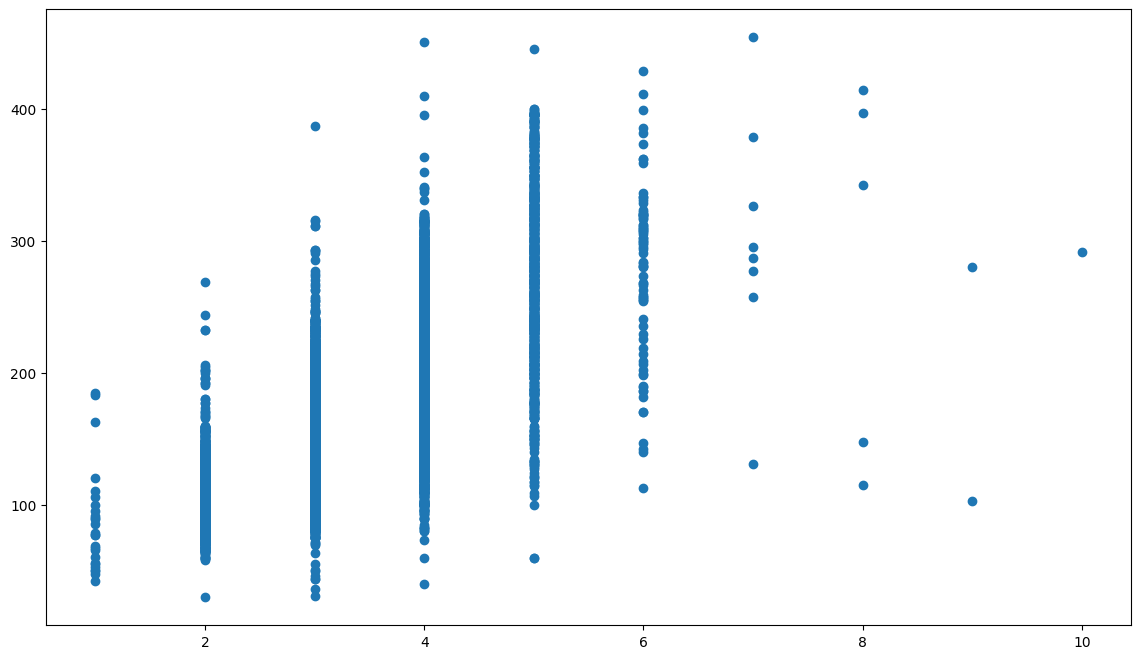

In [34]:
plt.figure(figsize=(14,8))
plt.scatter(df10["Bedroom"], df10["BuildingArea(sqm)"])
plt.show()

In [35]:
df11 = df10[df10["Bedroom"] < 7]

In [36]:
df11.shape

(19585, 292)

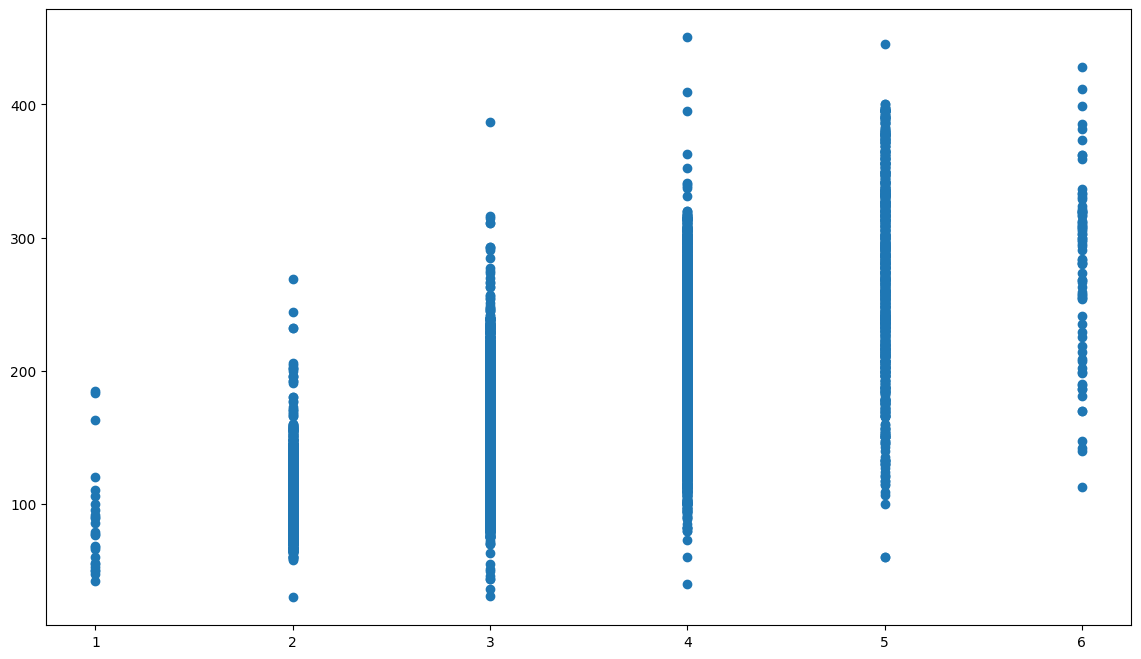

In [37]:
plt.figure(figsize=(14,8))
plt.scatter(df11["Bedroom"], df11["BuildingArea(sqm)"])
plt.show()

In [40]:
df11["Bathroom"] = df11["Bathroom"].round().astype(int)

In [41]:
df11["Bathroom"].unique()

array([1, 2, 3, 4, 0, 5, 7, 6])

In [42]:
df12 = df11[df11["Bathroom"]<df11["Bedroom"]+2]

In [43]:
df12.shape

(19582, 292)

In [44]:
df11.shape

(19585, 292)

In [46]:
df12 = df12[df12["Bathroom"]!=0]

In [47]:
df12.shape

(19569, 292)

In [48]:
df12["Carpark"] = df12["Carpark"].round().astype(int)

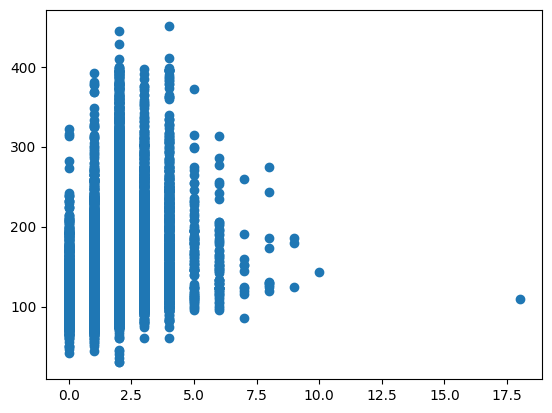

In [49]:
plt.scatter(df12["Carpark"], df12["BuildingArea(sqm)"])
plt.show()

In [50]:
df13 = df12[
    ((df12["Carpark"] >= 1) | (df12["BuildingArea(sqm)"] <= 100)) &  
    (df12["Carpark"] <= df12['BuildingArea(sqm)'] / 50) &  
    (df12["Carpark"] <= df12["Landsize(sqm)"] / 25)  
]



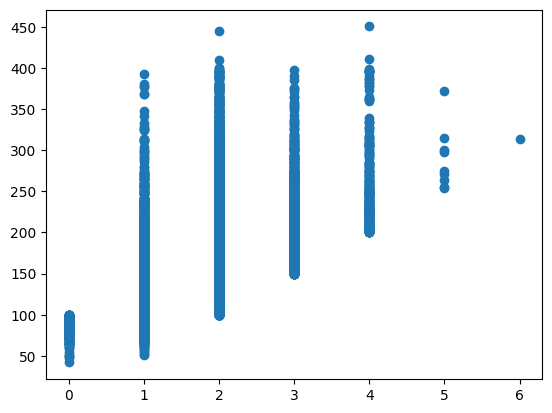

In [51]:
plt.scatter(df13["Carpark"], df13["BuildingArea(sqm)"])
plt.show()

In [52]:
df13.shape

(17041, 292)

In [53]:
df13.head()

,Rooms,Price,Bedroom,Bathroom,Carpark,Landsize(sqm),BuildingArea(sqm),Age,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,Braybrook,Briar Hill,Brighton,Brighton East,Broadmeadows,Brooklyn,Brunswick,Brunswick East,Brunswick West,Bulleen,Bundoora,Burnley,Burnside,Burnside Heights,Burwood,Burwood East,Cairnlea,Camberwell,Campbellfield,Canterbury,Carlton,Carlton North,Carnegie,Caroline Springs,Carrum,Carrum Downs,Caulfield,Caulfield East,Caulfield North,Caulfield South,Chadstone,Chelsea,Chelsea Heights,Cheltenham,Chirnside Park,Clarinda,Clayton,Clayton South,Clifton Hill,Coburg,Coburg North,Collingwood,Craigieburn,Cranbourne,Cremorne,Croydon,Croydon Hills,Croydon North,Croydon South,Dallas,Dandenong,Dandenong North,Deepdene,Deer Park,Delahey,Derrimut,Diamond Creek,Dingley Village,Docklands,Doncaster,Doncaster East,Donvale,Doreen,Doveton,Eaglemont,East Melbourne,Edithvale,Elsternwick,Eltham,Eltham North,Elwood,Endeavour Hills,Epping,Essendon,Essendon North,Essendon West,Fairfield,Fawkner,Ferntree Gully,Fitzroy,Fitzroy North,Flemington,Footscray,Forest Hill,Frankston,Frankston North,Frankston South,Gardenvale,Gisborne,Gladstone Park,Glen Huntly,Glen Iris,Glen Waverley,Glenroy,Gowanbrae,Greensborough,Greenvale,Hadfield,Hampton,Hampton East,Hawthorn,Hawthorn East,Heathmont,Heidelberg,Heidelberg Heights,Heidelberg West,Highett,Hillside,Hoppers Crossing,Hughesdale,Huntingdale,Ivanhoe,Ivanhoe East,Jacana,Kealba,Keilor,Keilor Downs,Keilor East,Keilor Park,Kensington,Kew,Kew East,Keysborough,Kilsyth,Kings Park,Kingsbury,Kingsville,Knoxfield,Kooyong,Kurunjang,Lalor,Langwarrin,Lower Plenty,MacLeod,Maidstone,Malvern,Malvern East,Maribyrnong,McKinnon,Meadow Heights,Melbourne,Melton,Melton South,Melton West,Mentone,Mernda,Middle Park,Mill Park,Mitcham,Mont Albert,Montmorency,Moonee Ponds,Moorabbin,Mooroolbark,Mordialloc,Mount Waverley,Mulgrave,Murrumbeena,Narre Warren,Newport,Niddrie,Noble Park,North Melbourne,Northcote,Nunawading,Oak Park,Oakleigh,Oakleigh East,Oakleigh South,Ormond,Pakenham,Parkdale,Parkville,Pascoe Vale,Plumpton,Point Cook,Port Melbourne,Prahran,Preston,Princes Hill,Reservoir,Richmond,Ringwood,Ringwood East,Ringwood North,Ripponlea,Rosanna,Rowville,Roxburgh Park,Sandringham,Scoresby,Seaford,Seaholme,Seddon,South Kingsville,South Melbourne,South Morang,South Yarra,Southbank,Spotswood,Springvale,Springvale South,St Albans,St Helena,St Kilda,Strathmore,Strathmore Heights,Sunbury,Sunshine,Sunshine North,Sunshine West,Surrey Hills,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,House,Townhouse,Suburb
0,2.0,942200.0,2,1,1,126.0,84.09,104.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [54]:
df13["Landsize(sqm)"].describe()

count    17041.000000
mean       867.856628
std       2477.415023
min          0.000000
25%        339.000000
50%        568.000000
75%        687.000000
max      89030.000000
Name: Landsize(sqm), dtype: float64

In [55]:
df14 = df13[df13["Landsize(sqm)"] > 0]


In [56]:

df15 = df14[(df14["Landsize(sqm)"] < 5000) & (df14["Landsize(sqm)"] > 50)]

In [57]:
df15.shape

(16602, 292)

In [58]:
df15["Landsize(sqm)"].describe()

count    16602.000000
mean       535.559535
std        279.014533
min         55.000000
25%        333.000000
50%        560.000000
75%        674.000000
max       4780.000000
Name: Landsize(sqm), dtype: float64

In [59]:
df15["BuildingArea(sqm)"].describe()

count    16602.000000
mean       162.321278
std         54.794455
min         42.000000
25%        124.000000
50%        150.000000
75%        191.600000
max        450.352000
Name: BuildingArea(sqm), dtype: float64

In [60]:
df16 = df15[
    (df15["BuildingArea(sqm)"] >= 50) &   
    (df15["BuildingArea(sqm)"] <= 500)    
]

In [61]:
df16.shape

(16600, 292)

In [62]:
df17 = df16[df16["BuildingArea(sqm)"] <= df16["Landsize(sqm)"]]

In [63]:
df17.shape

(16185, 292)

In [64]:
df17["Age"].describe()

count    16185.000000
mean        58.995070
std         31.535726
min        -82.000000
25%         34.000000
50%         55.600000
75%         76.000000
max        167.000000
Name: Age, dtype: float64

In [65]:
df18 = df17[(df17["Age"] >= 0) & (df17["Age"] <= 150)]

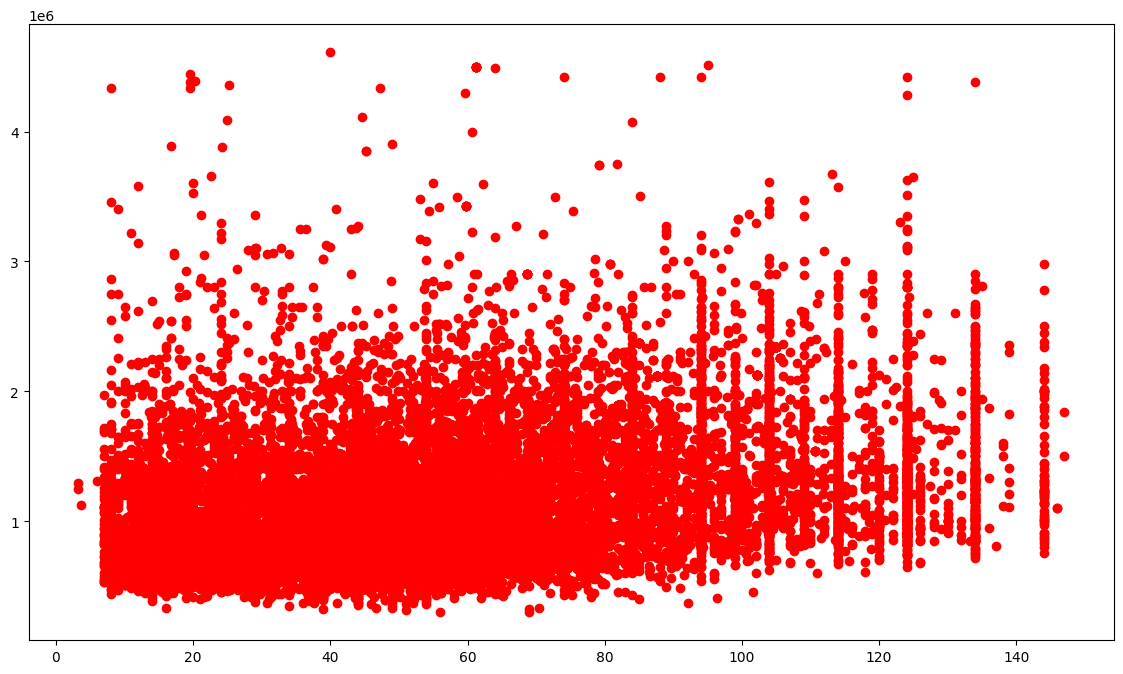

In [66]:
plt.figure(figsize=(14,8))
plt.scatter(df18["Age"],df18["Price"], color="red")
plt.show()

In [67]:
df18.shape

(16170, 292)

In [68]:
df18.head()

,Rooms,Price,Bedroom,Bathroom,Carpark,Landsize(sqm),BuildingArea(sqm),Age,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,Braybrook,Briar Hill,Brighton,Brighton East,Broadmeadows,Brooklyn,Brunswick,Brunswick East,Brunswick West,Bulleen,Bundoora,Burnley,Burnside,Burnside Heights,Burwood,Burwood East,Cairnlea,Camberwell,Campbellfield,Canterbury,Carlton,Carlton North,Carnegie,Caroline Springs,Carrum,Carrum Downs,Caulfield,Caulfield East,Caulfield North,Caulfield South,Chadstone,Chelsea,Chelsea Heights,Cheltenham,Chirnside Park,Clarinda,Clayton,Clayton South,Clifton Hill,Coburg,Coburg North,Collingwood,Craigieburn,Cranbourne,Cremorne,Croydon,Croydon Hills,Croydon North,Croydon South,Dallas,Dandenong,Dandenong North,Deepdene,Deer Park,Delahey,Derrimut,Diamond Creek,Dingley Village,Docklands,Doncaster,Doncaster East,Donvale,Doreen,Doveton,Eaglemont,East Melbourne,Edithvale,Elsternwick,Eltham,Eltham North,Elwood,Endeavour Hills,Epping,Essendon,Essendon North,Essendon West,Fairfield,Fawkner,Ferntree Gully,Fitzroy,Fitzroy North,Flemington,Footscray,Forest Hill,Frankston,Frankston North,Frankston South,Gardenvale,Gisborne,Gladstone Park,Glen Huntly,Glen Iris,Glen Waverley,Glenroy,Gowanbrae,Greensborough,Greenvale,Hadfield,Hampton,Hampton East,Hawthorn,Hawthorn East,Heathmont,Heidelberg,Heidelberg Heights,Heidelberg West,Highett,Hillside,Hoppers Crossing,Hughesdale,Huntingdale,Ivanhoe,Ivanhoe East,Jacana,Kealba,Keilor,Keilor Downs,Keilor East,Keilor Park,Kensington,Kew,Kew East,Keysborough,Kilsyth,Kings Park,Kingsbury,Kingsville,Knoxfield,Kooyong,Kurunjang,Lalor,Langwarrin,Lower Plenty,MacLeod,Maidstone,Malvern,Malvern East,Maribyrnong,McKinnon,Meadow Heights,Melbourne,Melton,Melton South,Melton West,Mentone,Mernda,Middle Park,Mill Park,Mitcham,Mont Albert,Montmorency,Moonee Ponds,Moorabbin,Mooroolbark,Mordialloc,Mount Waverley,Mulgrave,Murrumbeena,Narre Warren,Newport,Niddrie,Noble Park,North Melbourne,Northcote,Nunawading,Oak Park,Oakleigh,Oakleigh East,Oakleigh South,Ormond,Pakenham,Parkdale,Parkville,Pascoe Vale,Plumpton,Point Cook,Port Melbourne,Prahran,Preston,Princes Hill,Reservoir,Richmond,Ringwood,Ringwood East,Ringwood North,Ripponlea,Rosanna,Rowville,Roxburgh Park,Sandringham,Scoresby,Seaford,Seaholme,Seddon,South Kingsville,South Melbourne,South Morang,South Yarra,Southbank,Spotswood,Springvale,Springvale South,St Albans,St Helena,St Kilda,Strathmore,Strathmore Heights,Sunbury,Sunshine,Sunshine North,Sunshine West,Surrey Hills,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,House,Townhouse,Suburb
0,2.0,942200.0,2,1,1,126.0,84.09,104.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [71]:
df19 = df18.drop(["Suburb", "Age"], axis="columns")

In [72]:
df19.shape

(16170, 290)

In [73]:
X = df19.drop(["Price"], axis="columns")


In [74]:
y = df19["Price"]
y.head(3)

0     942200.0
1    1035000.0
2    1205500.0
Name: Price, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8651552035920246

In [77]:
X_train

,Rooms,Bedroom,Bathroom,Carpark,Landsize(sqm),BuildingArea(sqm),Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,Braybrook,Briar Hill,Brighton,Brighton East,Broadmeadows,Brooklyn,Brunswick,Brunswick East,Brunswick West,Bulleen,Bundoora,Burnley,Burnside,Burnside Heights,Burwood,Burwood East,Cairnlea,Camberwell,Campbellfield,Canterbury,Carlton,Carlton North,Carnegie,Caroline Springs,Carrum,Carrum Downs,Caulfield,Caulfield East,Caulfield North,Caulfield South,Chadstone,Chelsea,Chelsea Heights,Cheltenham,Chirnside Park,Clarinda,Clayton,Clayton South,Clifton Hill,Coburg,Coburg North,Collingwood,Craigieburn,Cranbourne,Cremorne,Croydon,Croydon Hills,Croydon North,Croydon South,Dallas,Dandenong,Dandenong North,Deepdene,Deer Park,Delahey,Derrimut,Diamond Creek,Dingley Village,Docklands,Doncaster,Doncaster East,Donvale,Doreen,Doveton,Eaglemont,East Melbourne,Edithvale,Elsternwick,Eltham,Eltham North,Elwood,Endeavour Hills,Epping,Essendon,Essendon North,Essendon West,Fairfield,Fawkner,Ferntree Gully,Fitzroy,Fitzroy North,Flemington,Footscray,Forest Hill,Frankston,Frankston North,Frankston South,Gardenvale,Gisborne,Gladstone Park,Glen Huntly,Glen Iris,Glen Waverley,Glenroy,Gowanbrae,Greensborough,Greenvale,Hadfield,Hampton,Hampton East,Hawthorn,Hawthorn East,Heathmont,Heidelberg,Heidelberg Heights,Heidelberg West,Highett,Hillside,Hoppers Crossing,Hughesdale,Huntingdale,Ivanhoe,Ivanhoe East,Jacana,Kealba,Keilor,Keilor Downs,Keilor East,Keilor Park,Kensington,Kew,Kew East,Keysborough,Kilsyth,Kings Park,Kingsbury,Kingsville,Knoxfield,Kooyong,Kurunjang,Lalor,Langwarrin,Lower Plenty,MacLeod,Maidstone,Malvern,Malvern East,Maribyrnong,McKinnon,Meadow Heights,Melbourne,Melton,Melton South,Melton West,Mentone,Mernda,Middle Park,Mill Park,Mitcham,Mont Albert,Montmorency,Moonee Ponds,Moorabbin,Mooroolbark,Mordialloc,Mount Waverley,Mulgrave,Murrumbeena,Narre Warren,Newport,Niddrie,Noble Park,North Melbourne,Northcote,Nunawading,Oak Park,Oakleigh,Oakleigh East,Oakleigh South,Ormond,Pakenham,Parkdale,Parkville,Pascoe Vale,Plumpton,Point Cook,Port Melbourne,Prahran,Preston,Princes Hill,Reservoir,Richmond,Ringwood,Ringwood East,Ringwood North,Ripponlea,Rosanna,Rowville,Roxburgh Park,Sandringham,Scoresby,Seaford,Seaholme,Seddon,South Kingsville,South Melbourne,South Morang,South Yarra,Southbank,Spotswood,Springvale,Springvale South,St Albans,St Helena,St Kilda,Strathmore,Strathmore Heights,Sunbury,Sunshine,Sunshine North,Sunshine West,Surrey Hills,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,House,Townhouse
8724,3.0,3,2,1,496.8,175.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85287537, 0.85517358, 0.86177419, 0.85238466, 0.85853482])

In [81]:
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit, ParameterGrid
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import pandas as pd


def find_best_model_using_randomsearchcv(X, y):
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "fit_intercept": [True, False]
            }
        },
        "lasso": {
            "model": Lasso(max_iter=10000),  # Increased max_iter for convergence
            "params": {
                "alpha": np.linspace(0.1, 2, 20),  # Adjusted alpha range
                "selection": ["random", "cyclic"]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ['squared_error', 'friedman_mse'],
                "splitter": ['best', 'random'],
                "max_depth": [5, 10, 20, None],
                "min_samples_split": [2, 5, 10]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        try:
            param_space_size = len(list(ParameterGrid(config["params"])))
            n_iter = min(20, param_space_size)  # Adjust n_iter based on parameter space size

            rs = RandomizedSearchCV(
                config["model"],
                config["params"],
                n_iter=n_iter,  # Use adjusted n_iter
                cv=cv,
                error_score="raise",
                random_state=42,
                n_jobs=-1
            )
            rs.fit(X_scaled, y) 

            scores.append({
                "model": algo_name,
                "best_score": rs.best_score_,
                "best_params": rs.best_params_
            })
        except Exception as e:
            print(f"Error with {algo_name}: {e}")

    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])


find_best_model_using_randomsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.856158,{'fit_intercept': True}
1,lasso,0.856149,"{'selection': 'random', 'alpha': 0.1}"
2,decision_tree,0.813990,"{'splitter': 'random', 'min_samples_split': 5,..."


In [95]:
def predict_price(Suburb, rooms, bedroom, bathroom, carpark, landsize, building_area, Type):
    
    feature_columns = list(X.columns)
    x = np.zeros(len(feature_columns))

    x[feature_columns.index("Rooms")] = rooms
    x[feature_columns.index("Bedroom")] = bedroom
    x[feature_columns.index("Bathroom")] = bathroom
    x[feature_columns.index("Carpark")] = carpark
    x[feature_columns.index("Landsize(sqm)")] = landsize
    x[feature_columns.index("BuildingArea(sqm)")] = building_area


    if Suburb in feature_columns:
        loc_index = feature_columns.index(Suburb)
        x[loc_index] = 1

    
    if Type in feature_columns:
        type_index = feature_columns.index(Type)
        x[type_index] = 1

    
    return model.predict([x])[0]


In [96]:
predicted_price = predict_price(
    Suburb="yallambie", 
    rooms=2, 
    bedroom=3, 
    bathroom=2, 
    carpark=1, 
    landsize=400, 
    building_area=160, 
    Type="house"
)

print(f"Predicted price: ${predicted_price:.2f}")


Predicted price: $483158.60


In [97]:
import pickle
with open("melbourne_home_prices.pickle","wb") as f:
    pickle.dump(model, f)

In [98]:
import json
columns = {
    "data_columns": [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))